### REMEMBER

we dropped the row number, customer ID, surname and gender columns. Dummy encoded the geography column to convert from categorical to boolean and engineered a new feature called loyalty by dividing each customer's tenure by their age.

**Recall** that the predictor variables of this data set are of different types. For example, balance and estimated salary are continuous while geography is categorical. Also, remember that scikit-learn has a few different implementations of the Naive Bayes algorithm. and each assumes that all of your predictor variables are of a single type

**Gaussian** implementation assumes that all of your variables are continuous and that they have a Gaussian or normal distribution. Our data doesn't perfectly adhere to these assumptions, but a Gaussian model may still give us usable results, even with imperfect data

In [2]:
import exploratory_data_analysis.eda_functions as eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as NB

## Scaler function
## A good idea when modeling, is to scaling your predictor variables (most of the time)
from sklearn.preprocessing import MinMaxScaler

## metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

In [28]:
loc = '~/Scripts/DS/MachineLearning/data/churnModeling.csv'
df = pd.read_csv(loc)
df.drop(['Tenure', 'Age'], axis=1, inplace=True)
## upSample minority class.
df1 = eda.upsample_minority_class(df, 'Exited')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        4074 non-null   int64  
 1   Balance            4074 non-null   float64
 2   NumOfProducts      4074 non-null   int64  
 3   HasCrCard          4074 non-null   int64  
 4   IsActiveMember     4074 non-null   int64  
 5   EstimatedSalary    4074 non-null   float64
 6   Exited             4074 non-null   int64  
 7   Loyalty            4074 non-null   float64
 8   Geography_Germany  4074 non-null   int64  
 9   Geography_Spain    4074 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 318.4 KB


VALUE COUNTS
1    2037
0    2037
Name: Exited, dtype: int64
1    50.0
0    50.0
Name: Exited, dtype: float64


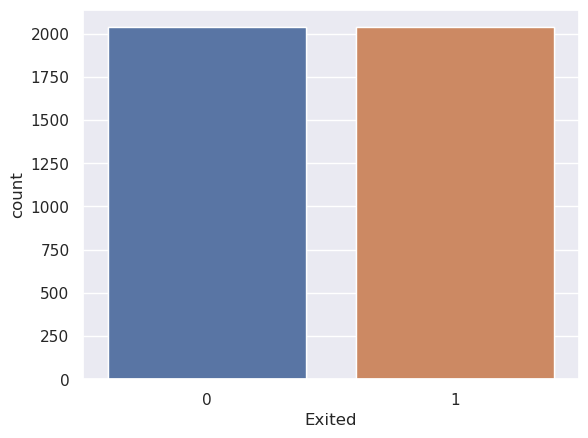

In [6]:
## Observing target distribution
## 
sns.countplot(data=df1, x='Exited');
print('VALUE COUNTS')
print(df1['Exited'].value_counts())
print(df1['Exited'].value_counts(normalize=True)*100)
sns.countplot(x=df1['Exited']);

In [7]:
## Define the y (target) variable
y = df1['Exited']

# Define the X (predictor) variables
X = df1.copy()
X = X.drop('Exited', axis=1)

## Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3055, 9) (1019, 9) (3055,) (1019,)


In [8]:
## Scaling, Fit the scaler to the training data
scaler = MinMaxScaler()
scaler.fit(X_train)

## Scale the training data
X_train = scaler.transform(X_train)

## Scale the test data
X_test = scaler.transform(X_test)

In [12]:
NB.__dir__()[-4:]

['MultinomialNB', 'ComplementNB', 'BernoulliNB', 'CategoricalNB']

In [29]:
## Naive Bayes models from Sklearn

gaunb = NB.GaussianNB()
bernb = NB.BernoulliNB()
catnb = NB.CategoricalNB()
comnb = NB.ComplementNB()
mulnb = NB.MultinomialNB()
NBModels = [
    gaunb,
    bernb, 
    catnb,
    comnb,
    mulnb,
]

MODEL: GaussianNB()
Accuracy: 0.664
Precision: 0.679
Recall: 0.623
F1 Score: 0.650


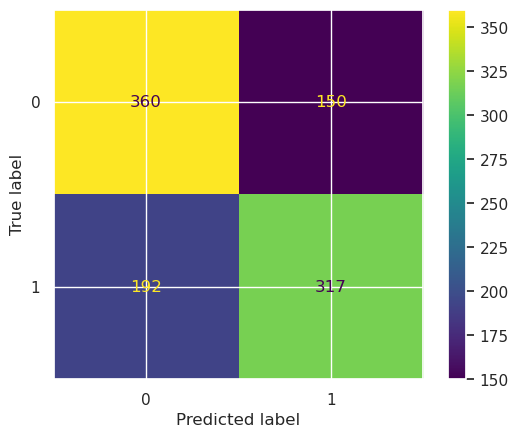

MODEL: BernoulliNB()
Accuracy: 0.631
Precision: 0.645
Recall: 0.582
F1 Score: 0.612


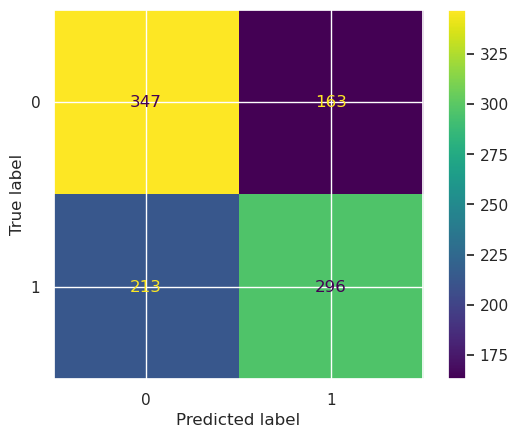

MODEL: CategoricalNB()
Accuracy: 0.599
Precision: 0.587
Recall: 0.660
F1 Score: 0.622


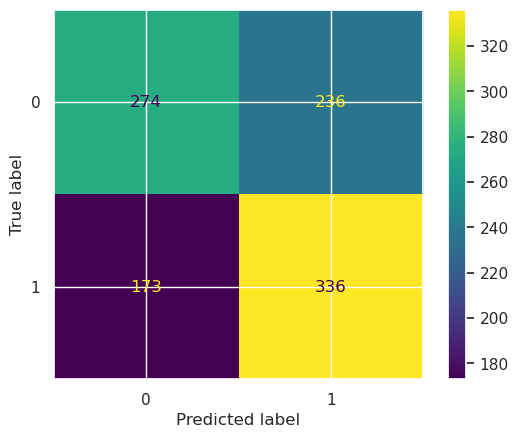

MODEL: ComplementNB()
Accuracy: 0.613
Precision: 0.627
Recall: 0.558
F1 Score: 0.590


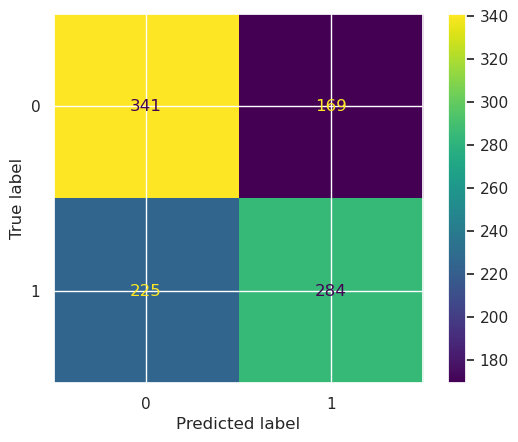

MODEL: MultinomialNB()
Accuracy: 0.613
Precision: 0.627
Recall: 0.558
F1 Score: 0.590


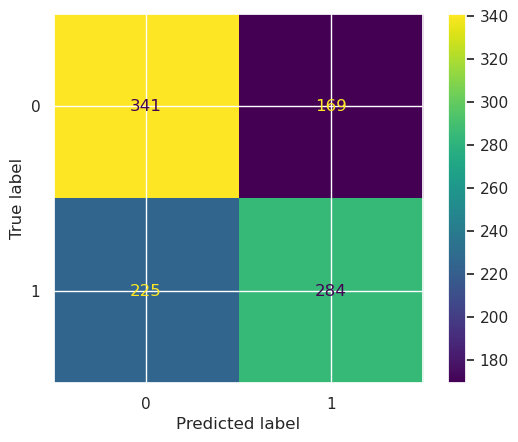

In [26]:
results = {}

for m in NBModels:
    # Fit the model
    results[m] = m
    m.fit(X_train, y_train)
    m.fit(X_train, y_train).predict(X_test)
    
    ## Scores
    print(f'MODEL: {m}')
    print('Accuracy:', '%.3f' % accuracy_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('Precision:', '%.3f' % precision_score(y_test,m.fit(X_train, y_train).predict(X_test)))
    print('Recall:', '%.3f' % recall_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('F1 Score:', '%.3f' % f1_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    
    ## conf mat
    conf_matrix_plot(m.fit(X_train, y_train), X_test, y_test)